# Data Analysis for Electronic Sales in USA during 2019
## Prepared by: Ahmed Abdel Rhem


In [2]:
import pandas as pd
import os
import seaborn as sns
from datetime import datetime

## We have data for all months during 2019
## Showing The Data for one Month

In [4]:
df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
files=[file for file in os.listdir('./Sales_Data')]
for file in files:
    print (file)
    


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


## We need to concatenate all data for each month in one file

In [6]:
files=[file for file in os.listdir('./Sales_Data')]
all_months_data = pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv('all_data.csv',index=False)

## Showing the data after concatenation and converting any strange sign to NaN

In [7]:
df=pd.read_csv('all_data.csv',na_values=['?','N\A','no'])
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Cleaning up the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Detecting Null Values

In [9]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64

## Dropping Rows Containing NaN

In [11]:
df.dropna(axis=0,inplace=True)
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


## Confirming after removing NAN

In [12]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Converting Objects data to Numric data

In [13]:
cols=['Order ID','Quantity Ordered','Price Each']
for col in cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  float64
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(3), object(3)
memory usage: 9.9+ MB


## Statistics on the converted data

In [14]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


## Adding columns for the  Year,Month,Hour and Minute

In [15]:
df['Month'] = df['Order Date'].str[0:2]
df['Hour'] = df['Order Date'].str[8:11]
df['Minute'] = df['Order Date'].str[12:14]
cols=['Month','Hour','Minute']
for col in cols:
    df[col]=pd.to_numeric(df[col],errors='coerce')
df['Year']=2019

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Year
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,8.0,46.0,2019
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,22.0,30.0,2019
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,14.0,38.0,2019
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,14.0,38.0,2019
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,9.0,27.0,2019


## Performing some useful operations 

In [16]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minute,Year,Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4.0,8.0,46.0,2019,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4.0,22.0,30.0,2019,99.99
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,14.0,38.0,2019,600.00
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4.0,14.0,38.0,2019,11.99
5,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4.0,9.0,27.0,2019,11.99


In [17]:
df.groupby(['Month']).sum()

,Order ID,Quantity Ordered,Price Each,Hour,Minute,Year,Sales
Month,,,,,,,
1.0,1.421631e+09,10903.0,1.811768e+06,157099.0,174288.0,19602471,1.822257e+06
2.0,1.871053e+09,13449.0,2.188885e+06,195453.0,203615.0,24177525,2.202022e+06
3.0,2.564811e+09,17005.0,2.791208e+06,245929.0,271403.0,30593907,2.807100e+06
4.0,3.387347e+09,20558.0,3.367671e+06,262585.0,543812.0,36905301,3.390670e+06
5.0,3.345872e+09,18667.0,3.135125e+06,266678.0,301858.0,33446754,3.152607e+06
6.0,2.932976e+09,15253.0,2.562026e+06,220368.0,243718.0,27365526,2.577802e+06
7.0,3.284140e+09,16072.0,2.632540e+06,231335.0,252959.0,28857567,2.647776e+06
8.0,2.899374e+09,13448.0,2.230345e+06,193232.0,218270.0,24149259,2.244468e+06
9.0,2.948727e+09,13109.0,2.084992e+06,189772.0,205366.0,23462799,2.097560e+06


In [18]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

range(1, 13)


## Showing some plots showing the sales for each month in 2019 and the highest sales recorded in this year

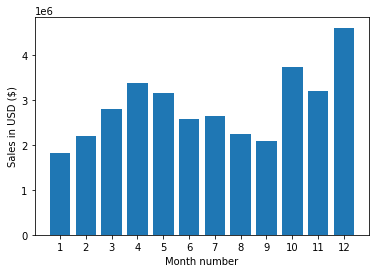

In [20]:
plt.bar(months,df.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


## Plot showing the higher ordered products in 2019

<AxesSubplot:xlabel='Product', ylabel='count'>

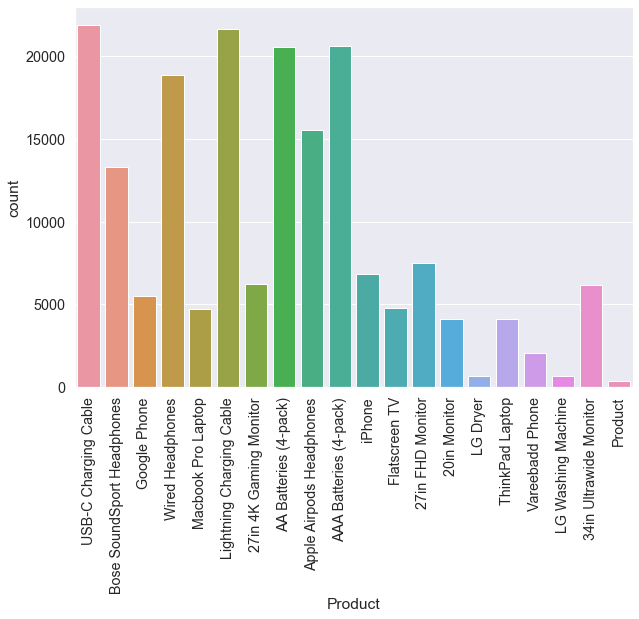

In [21]:
sns.set(rc={'figure.figsize':[10,7]}, font_scale=1.3)
plt.xticks(rotation=90)
sns.countplot(x='Product',data=df)

<BarContainer object of 12 artists>

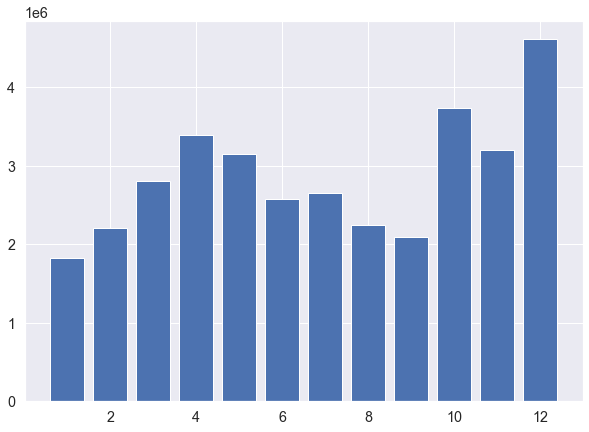

In [234]:
plt.bar(months,df.groupby(['Month']).sum()['Sales'])

<BarContainer object of 12 artists>

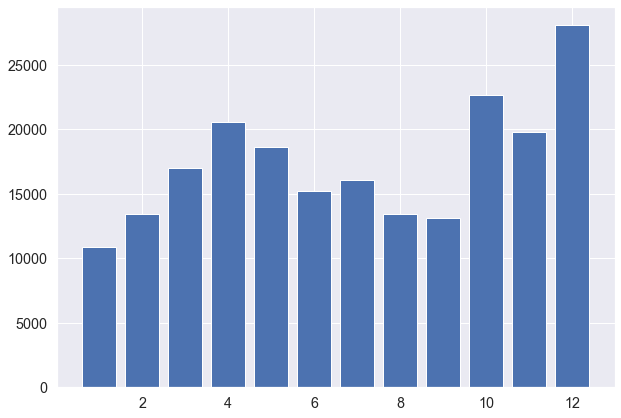

In [24]:
plt.bar(months,df.groupby(['Month']).sum()['Quantity Ordered'])

### What time should we display advertisements to maximize likelihood of customer's buying product?¶

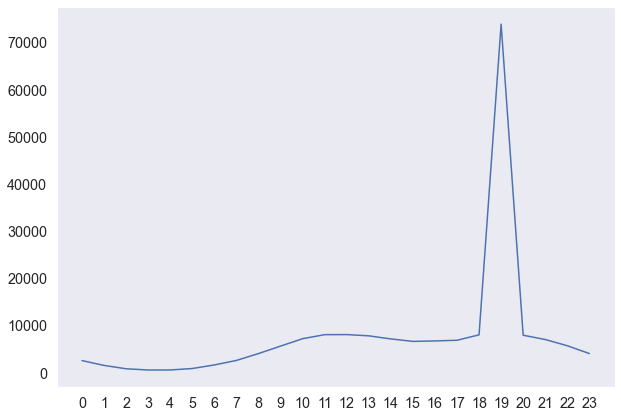

In [25]:
df['Count'] = 1
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

### What are the most common products requested by clients?

<AxesSubplot:ylabel='Product'>

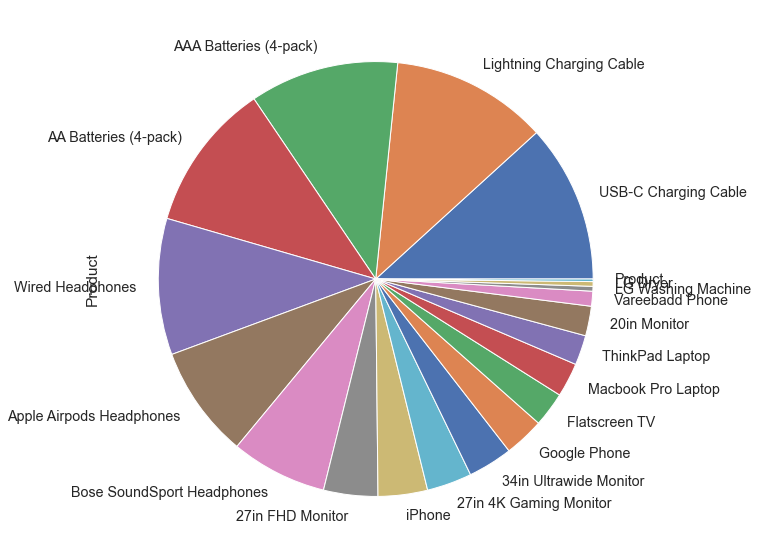

In [26]:
df['Product'].value_counts().plot(kind='pie',figsize=(10,10))

## From the previous analysis it was noticed that the highest sales  was recorded during December month which due to the christmas season.

### The best time for advertisment will at 7 to 8 p.m which will help to increase the sales.

## Thanks